In [1]:
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook

# Soil moisture analysis switzerland

Comparison of modelled soil moisture (PREVAH, ERA5, ERA5-Land, Lisflood, UERRA) with in-situ soil
 moisture from the SwissSMEX (SWMX) dataset.
 
## Datasets
Model data were interpolated to represent soil moisture at the same depth (50 cm) as the in
situ measurement.
### Models
* ERA5: [DOI: 10.24381/cds.adbb2d47](https://doi.org/10.24381/cds.adbb2d47)
* ERA5-Land: [DOI: 10.24381/cds.e2161bac](https://doi.org/10.24381/cds.e2161bac)
* UERRA (MESCAN-SURFEX): [access through CDS](cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-uerra-europe-complete?tab=overview)
* LISFLOOD: [DOI: 10.23381/cds.3458969](https://doi.org/10.23381/cds.3458969)
* PREVAH: Zappa and Gurtz (2003) [DOI: 10.1007/s10346-020-01400-y](https://doi.org/10.1007/s10346-020-01400-y); 
    Viviroli et al. (2009) [DOI: 10.1016/j.envsoft.2009.004.001](https://doi.org/10.1016/j.envsoft.2009.004.001)

PREVAH represents a high-resolution, locally optimised hydrological model and acts as a reference
for this comparison.

### Reference
SwissSMEX in-situ measurements: Mittelbach and Seneviratne (2012)
    [DOI: 10.5194/hess-16-2169-2012](https://doi.org/10.5194/hess-16-2169-2012)

We selected 6 stations with long and uninterrupted time-series:
* Payerne
* Plaffeien
* Wynau
* Chamau
* Reckenholz
* Taenikon

![Map with SwissSMEX sites](map.png)

In [2]:
import pandas as pd

swmx_sites = pd.read_csv('/mnt/CEPH_PROJECTS/ADO/SM/reference_data/SiteInfo_SwissSMEX0713_grassland_selected.csv',
                         skiprows=1)
print(swmx_sites.loc[:, ['Site', 'Elevation', 'Landuse', 'Texture', 'ID']])

         Site  Elevation    Landuse     Texture  ID
0     Payerne        490  grassland        loam   2
1   Plaffeien       1042  grassland  sandy loam   3
2       Wynau        422  grassland   silt loam   7
3      Chamau        400  grassland  sandy loam   8
4  Reckenholz        443  grassland        loam  10
5    Taenikon        536  grassland        loam  11


## Methods

* SwissSMEX in-situ measurements were converted from mm to m^3/m^-3: $SM_{vol} = SM_{mm} / 500$
* To offset the impact of biases between the different models, the comparison is based on anomalies (SMA). We used
to following equation to compute SMA's: $SMA = SM_t - \bar{SM} / \delta_{SM}$ where $SM_t$ is the
current value of SM on any given data, $\bar{SM}$ is the long-term average, and $\delta_{SM}$ the related
standard deviation. The reference period was selected for each site individually, based on the temporal overlap between
all models.

## Analysis

In [3]:
from model_comparison import initialize_stacks
ERA5, ERA5l, LISFLOOD, UERRA = initialize_stacks()

The following section shows several plots for each of the six selected SwissSMEX sites: time-series plots
covering the full period of available data; time-series plots just for the years 2012 and 2018; Scatterplots
which show a direct comparison between in-situ and modelled soil moisture.

The table summarizes the accuracy of modelled soil moisture, in terms of R and RMSE, with
respect to the SwissSMEX measurements. The average in the last column refers to the average
soil moisture computed over all stations.

**R**

|--------|Payerne  |Plaffeien|Wynau    |Chamau   |Reckenholz|Taenikon  |Average  |
|--------|---------|---------|---------|---------|----------|----------|---------|
|PREVAH  |0.705    |**0.678**|**0.749**|0.437    |0.642     |0.624     |0.623    |
|ERA5    |0.617    |0.592    |0.680    |0.442    |0.614     |0.574     |0.647    |
|ERA5-L  |0.641    |0.536    |0.745    |0.455    |0.585     |0.547     |0.642    |
|LISFLOOD|**0.736**|0.544    |0.712    |0.194    |**0.794** |**0.778** |**0.733**|
|UERRA   |0.721    |**0.678**|0.634    |**0.541**|0.539     |0.657     |0.577    |

**RMSE**

|--------|Payerne  |Plaffeien|Wynau    |Chamau   |Reckenholz|Taenikon  |Average  |
|--------|---------|---------|---------|---------|----------|----------|---------|
|PREVAH  |0.803    |0.842    |**0.760**|1.164    |0.908     |0.906     |0.914    |
|ERA5    |0.910    |0.928    |0.837    |1.064    |0.905     |0.938     |0.870    |
|ERA5-L  |0.865    |1.005    |0.749    |1.059    |0.934     |0.964     |0.878    |
|LISFLOOD|**0.752**|0.859    |0.775    |1.274    |**0.670** |**0.662** |**0.741**|
|UERRA   |0.761    |**0.835**|0.917    |**0.992**|0.961     |0.849     |0.963    |

This first overview shows that correlations are relatively low in general. Interestingly,
higher spatial resolution does not always lead to higher accuracies. Performances are relatively
similar across the tested models.

### Individual Stations
#### Payerne

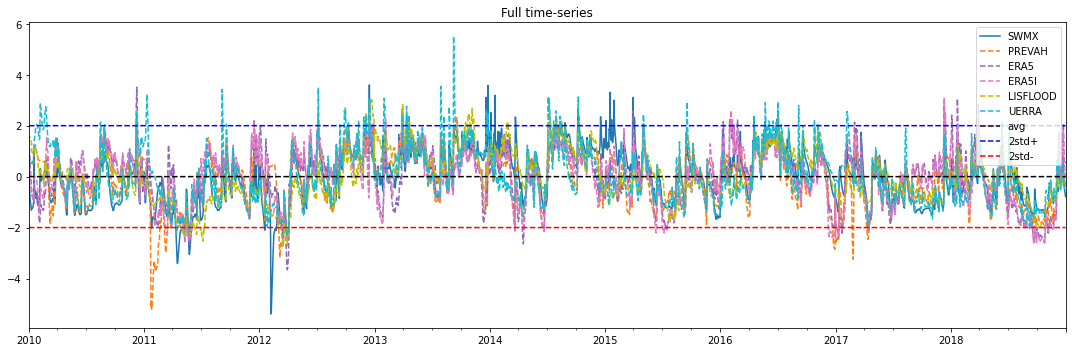

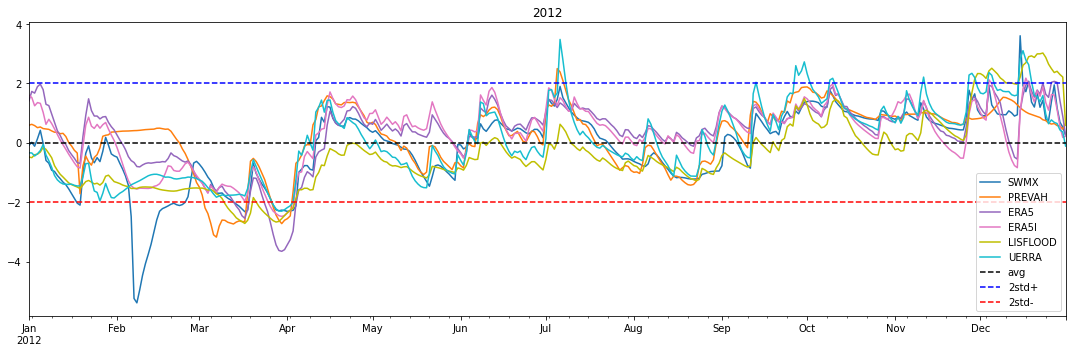

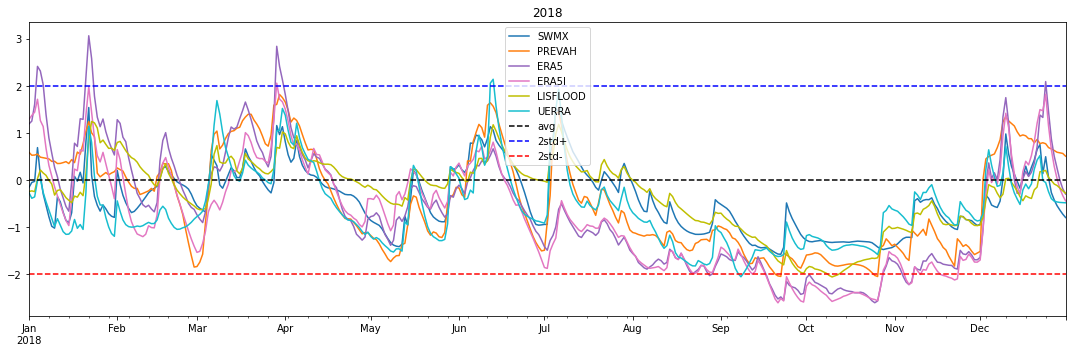

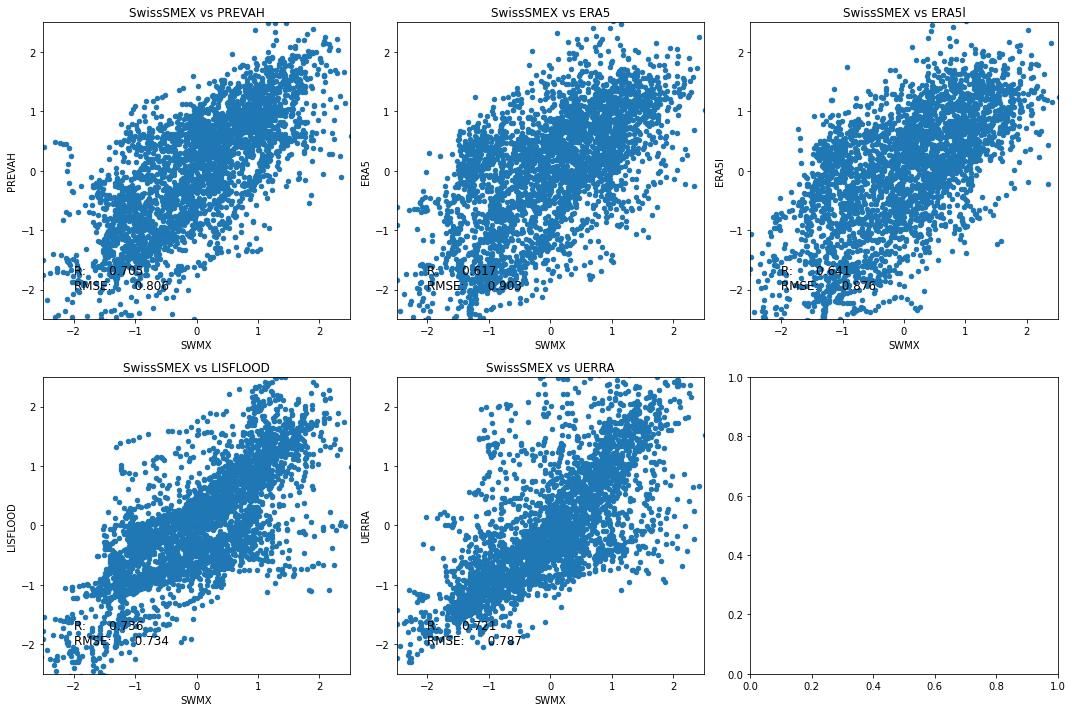

In [4]:
from model_comparison import SwissSMEX_ts_create_plots

# setting
interval = 1
monthly=True
anomalies=True
year = [2012, 2018]

i_swmx = 'PAY'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                                     LISFLOOD,
                                                     UERRA,
                                                     swmx_sites.iloc[0],
                                                     interval,
                                                     year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])
all_stations = merged.copy()
all_stations.columns = mindex

#### Plaffeien

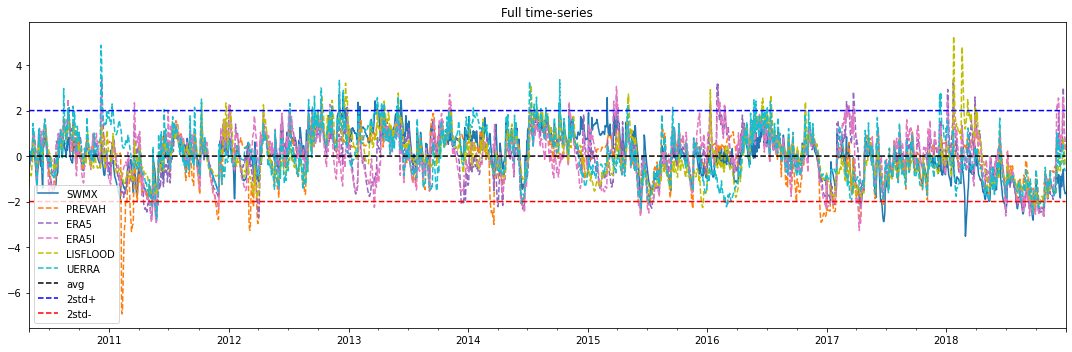

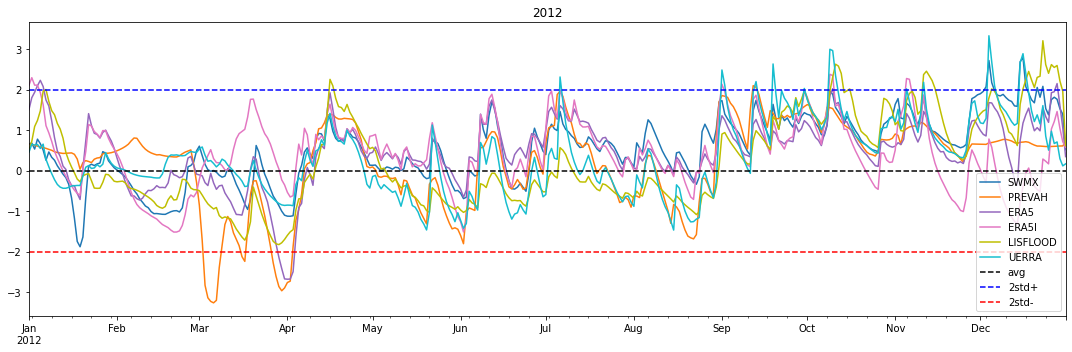

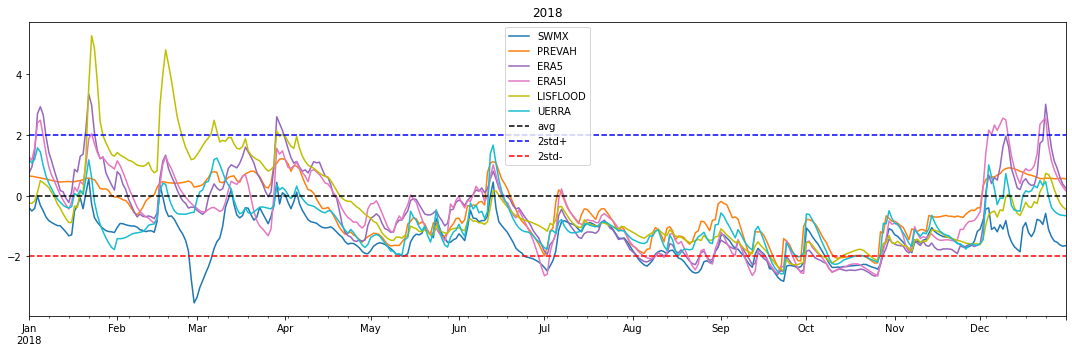

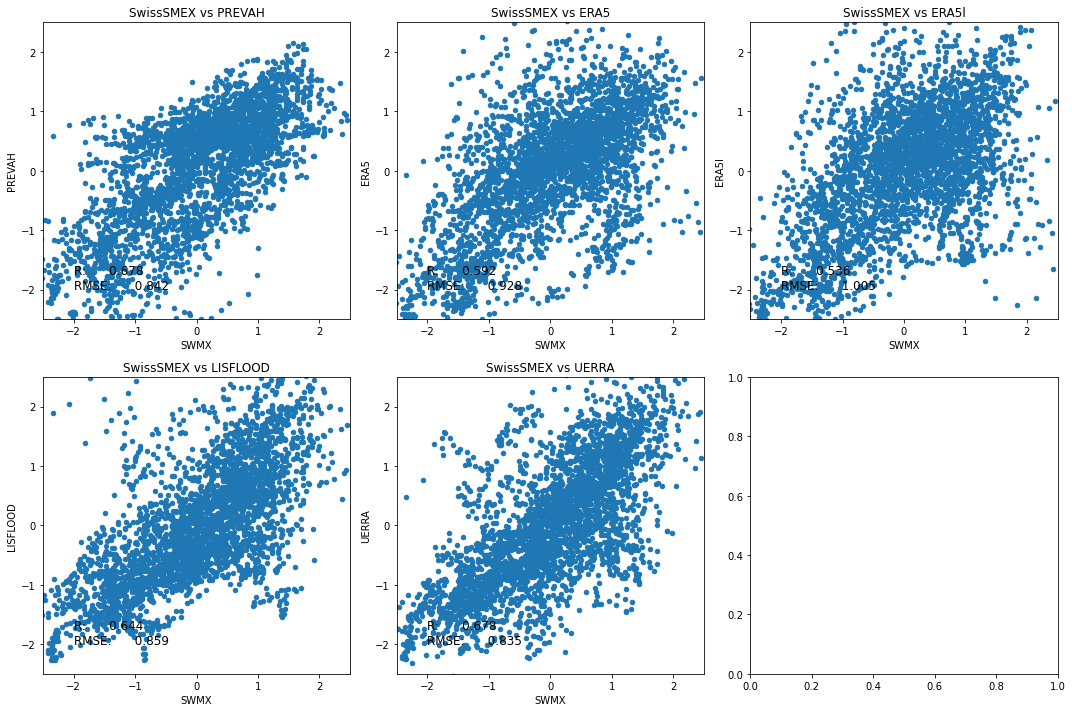

In [5]:
i_swmx = 'PLA'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[1],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

#### Wynau

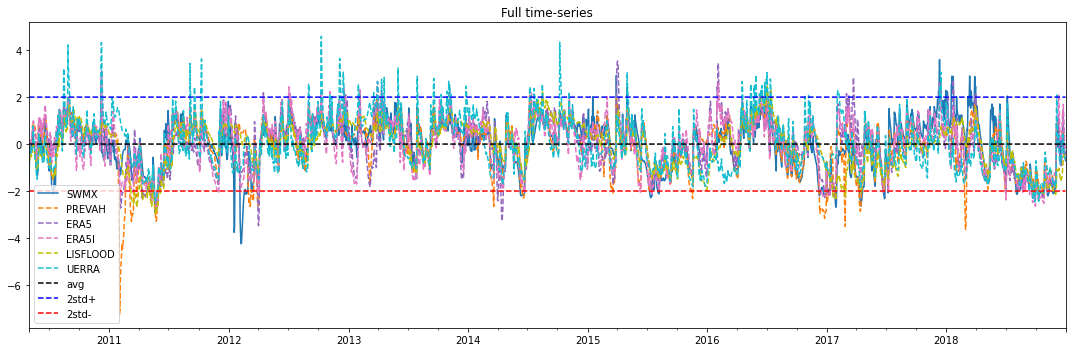

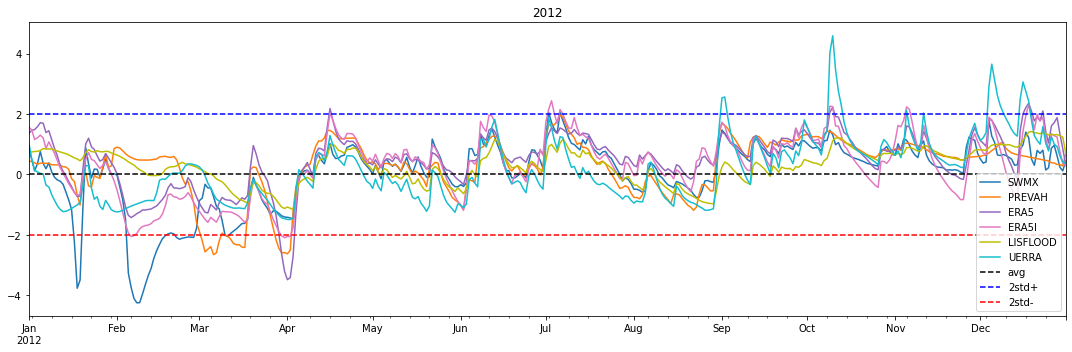

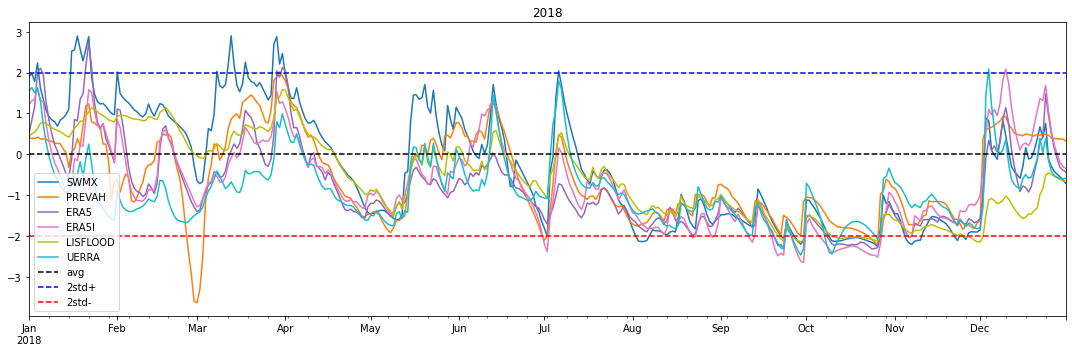

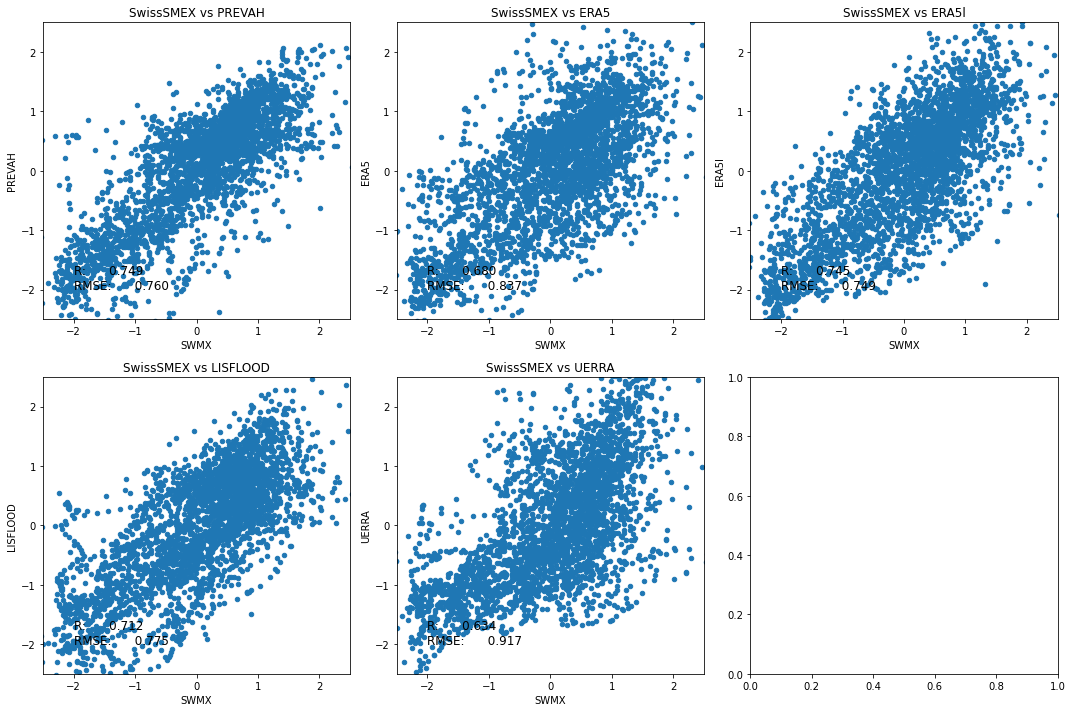

In [6]:
i_swmx = 'WYN'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[2],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

#### Chamau

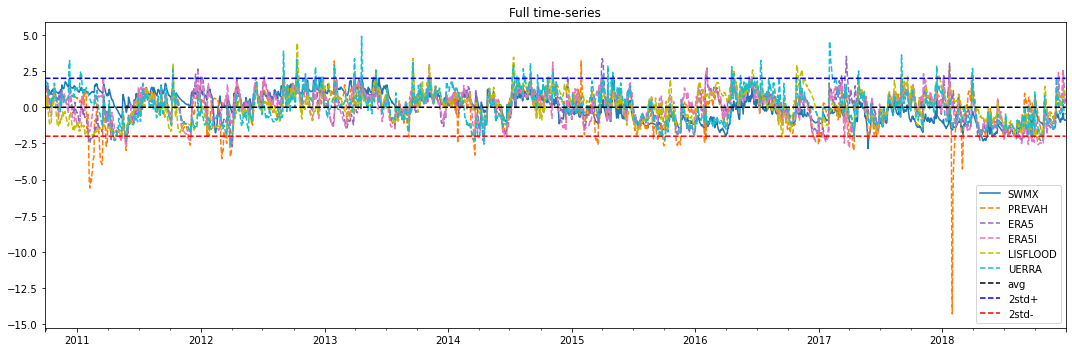

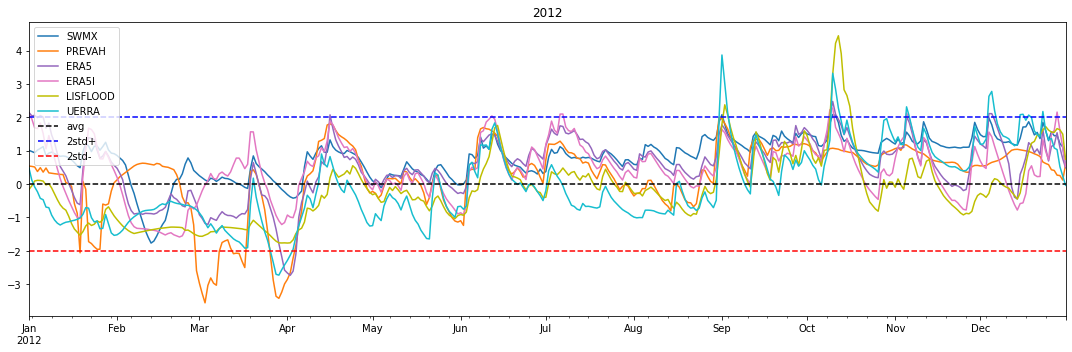

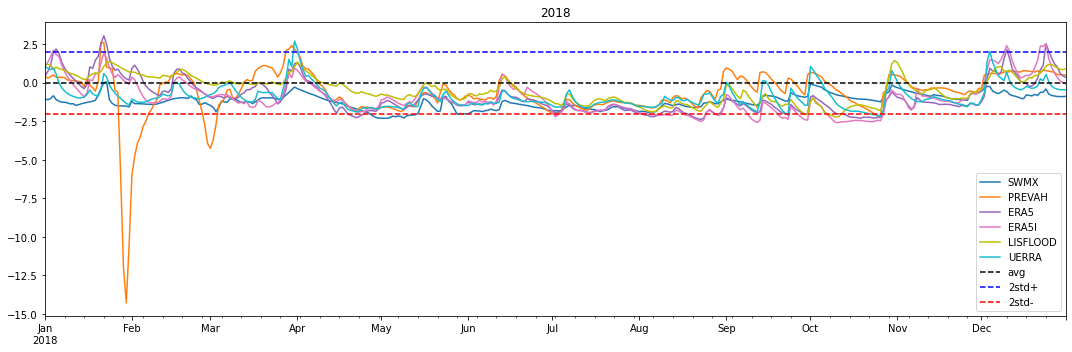

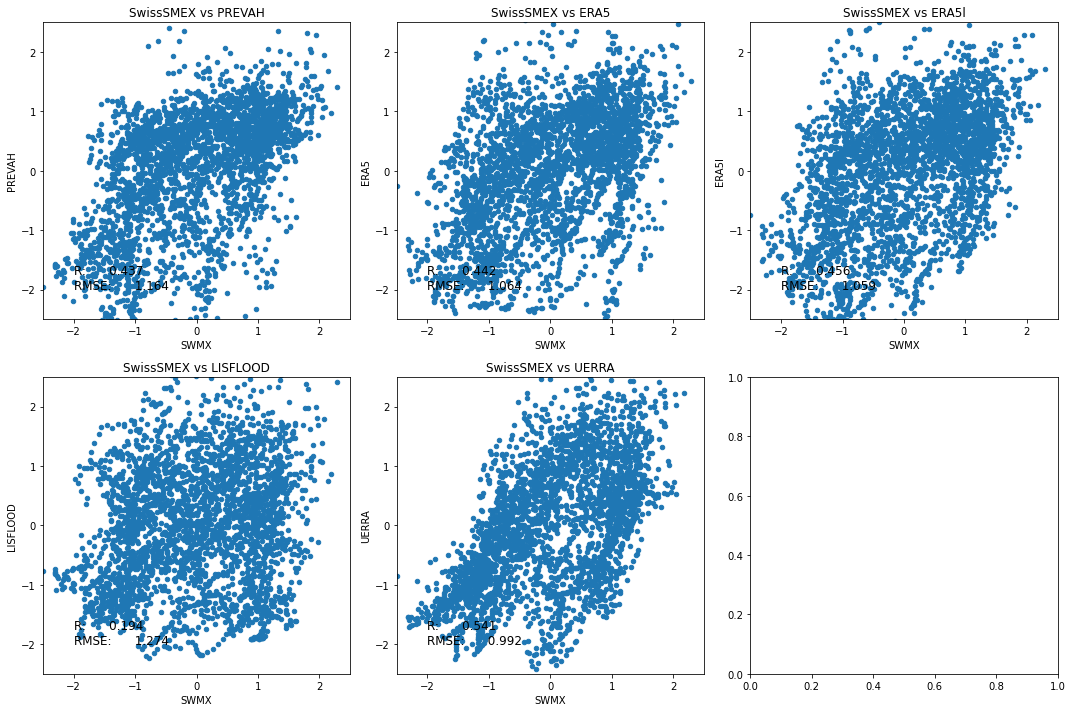

In [7]:
i_swmx = 'CHM'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[3],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

#### Reckenholz

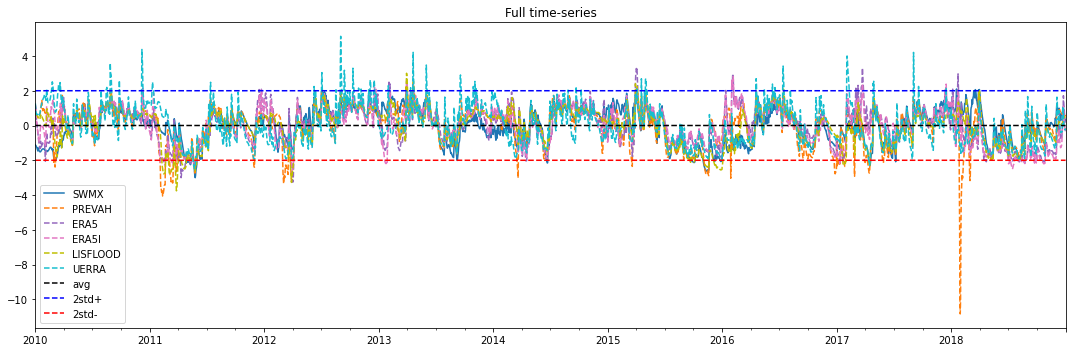

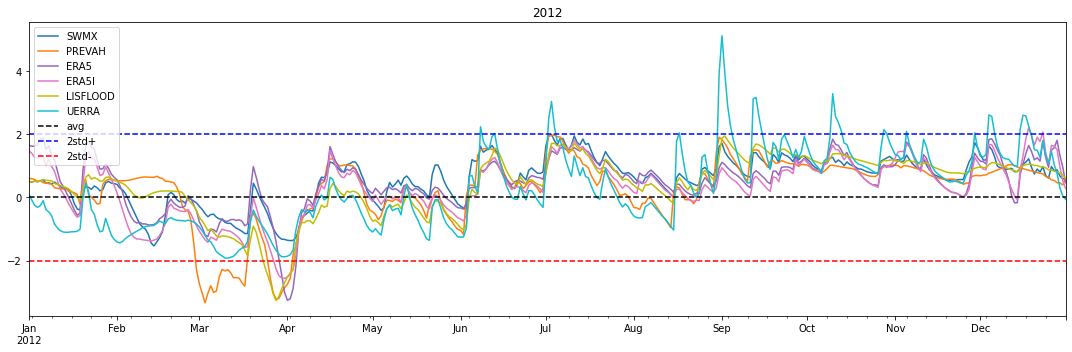

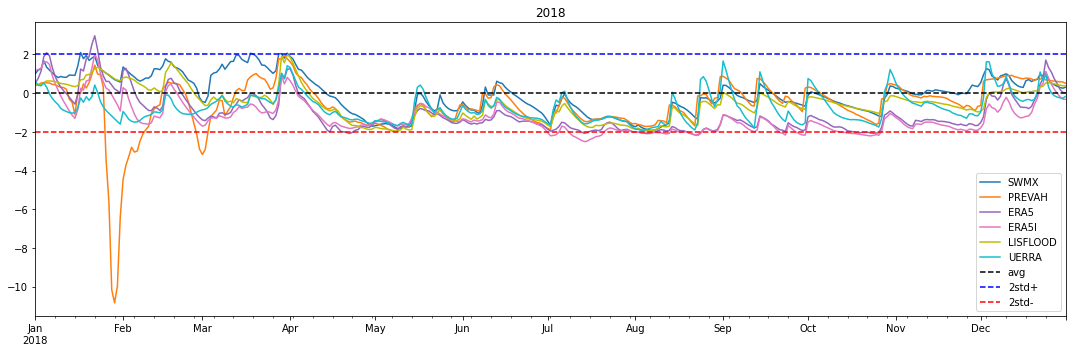

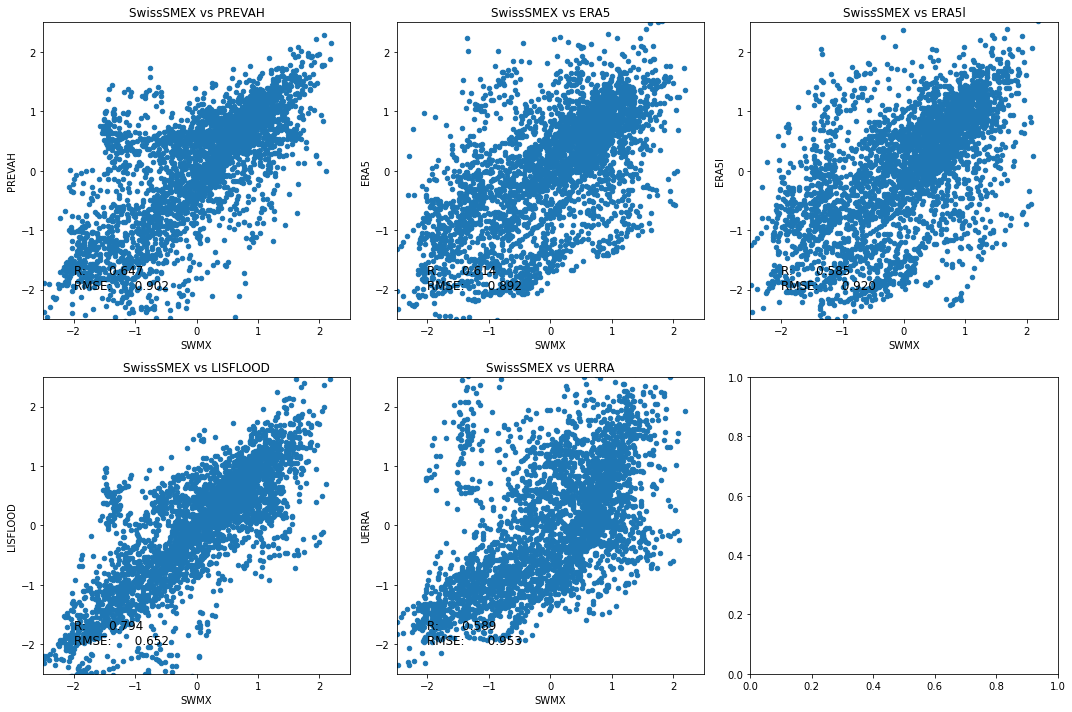

In [8]:
i_swmx = 'REC'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[4],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

#### Taenikon

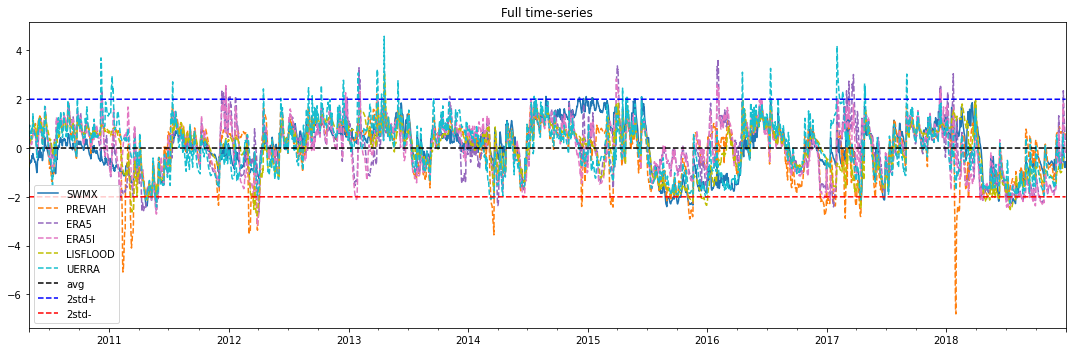

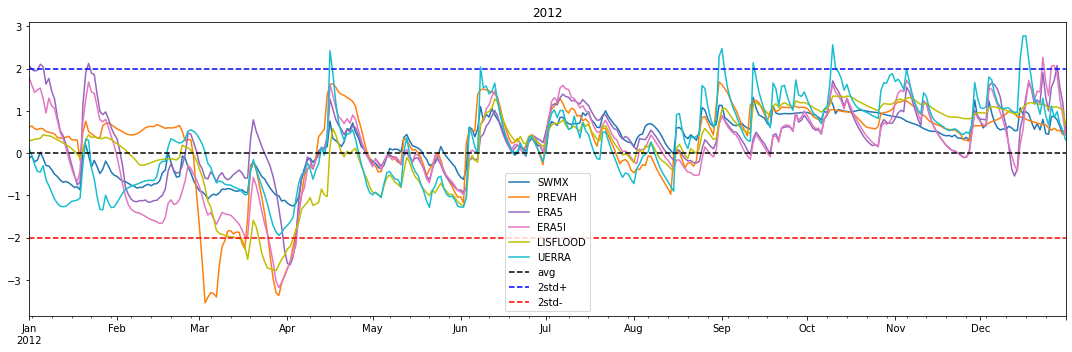

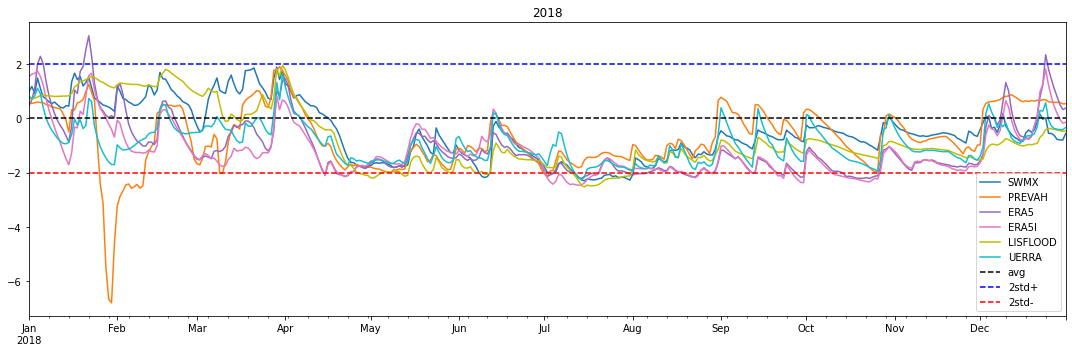

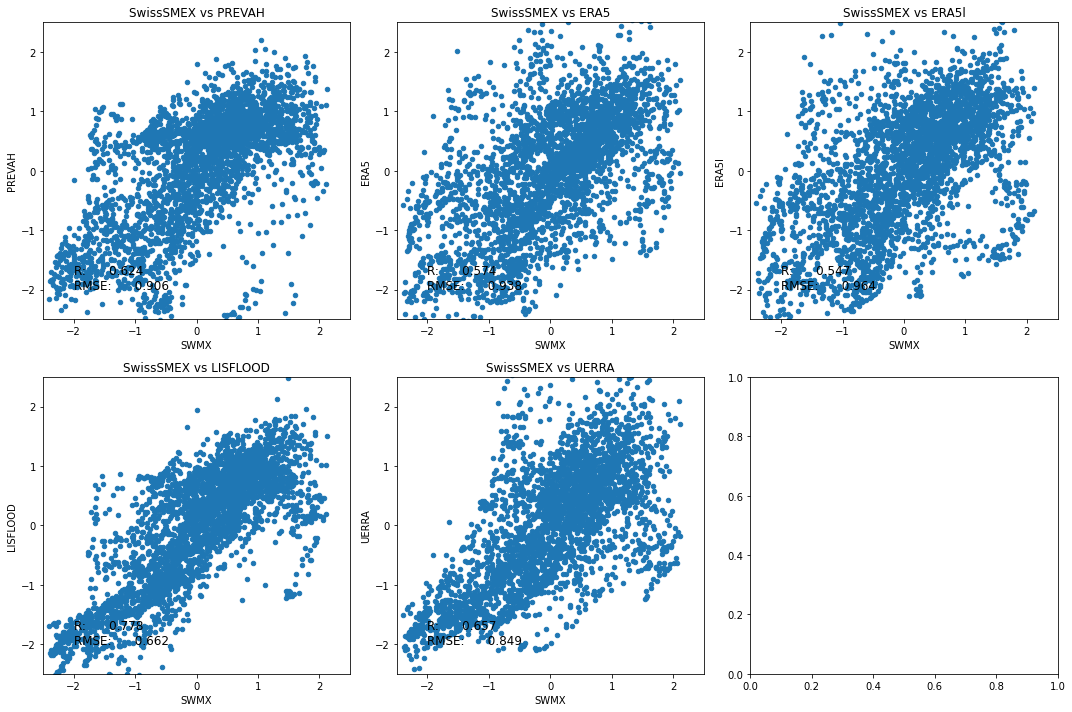

In [9]:
i_swmx = 'TAE'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[5],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

### Average Conditions
The plots below shows the time-series of average soil moisture

#### Time-series

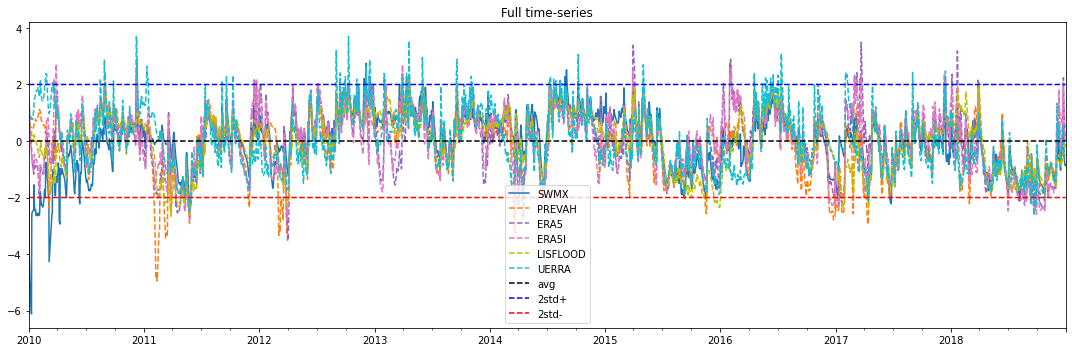

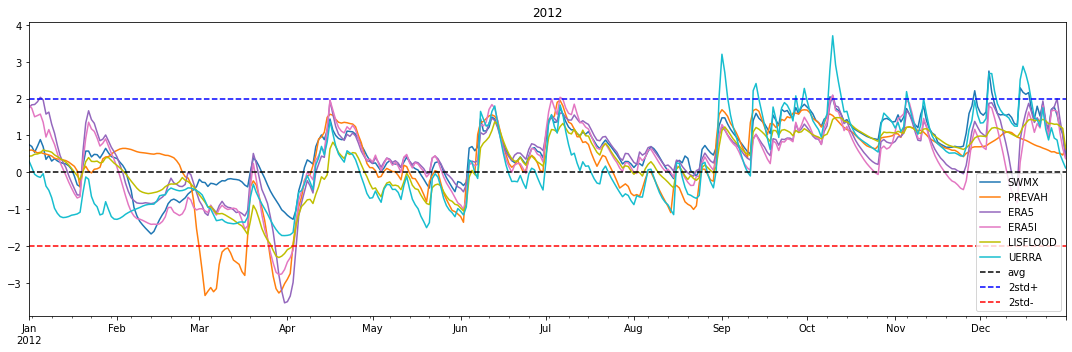

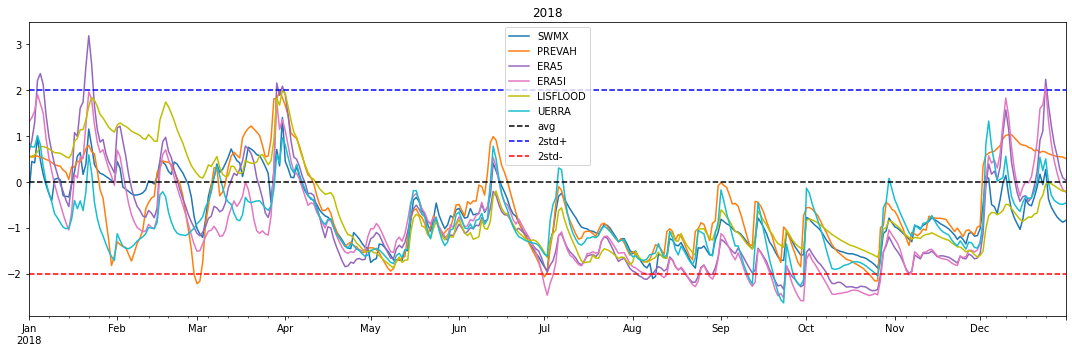

In [10]:
from model_comparison import plot_only_ts
import matplotlib.pyplot as plt
import numpy as np

avg_stations = all_stations.groupby(level=1, axis=1).mean()
anom_merged = plot_only_ts(avg_stations[
                               ['SWMX', 'PREVAH', 'ERA5', 'ERA5l', 'LISFLOOD', 'UERRA']
                           ], '', 'Average', [2012, 2018], anomalies=True, monthly=True)

#### Scatterplots

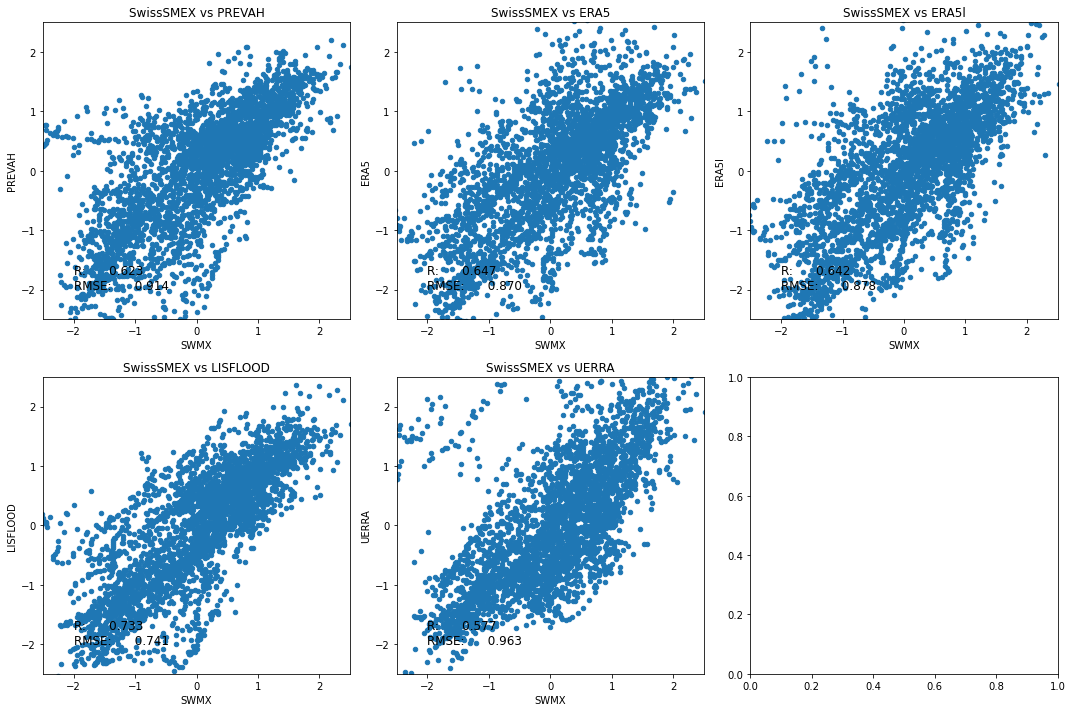

In [11]:
# create scatterplot
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
collist = ['PREVAH', 'ERA5', 'ERA5l', 'LISFLOOD', 'UERRA']

scattermerged = anom_merged

# scattermerged[scattermerged.isnull().any(axis=1)] = np.nan
scattermerged = scattermerged.dropna(axis=0)

pearsonr = scattermerged.corr()

for i in range(5):
    if anomalies:
        plotlims = [-2.5, 2.5]
    else:
        plotlims = [0.1, 0.7]
    scattermerged.plot.scatter(x='SWMX', y=collist[i], ax=axs[np.unravel_index(i, (2, 3))],
                               title='SwissSMEX vs ' + collist[i],
                               xlim=plotlims, ylim=plotlims)
    # calculate rmse
    rmse = ((scattermerged[collist[i]] - scattermerged['SWMX']) ** 2).mean() ** .5
    axs[np.unravel_index(i, (2, 3))].text(0.1, 0.1,
                                          "R: " + "{:10.3f}".format(pearsonr['SWMX'][collist[i]]) + '\n' +
                                          "RMSE: " + "{:10.3f}".format(rmse),
                                          transform=axs[np.unravel_index(i, (2, 3))].transAxes,
                                          size='large')

fig.tight_layout()

#### Drought Sensitivity
Next we want to evaluate the ability of different soil moisture models to detect drought. For
this purpose we classify drought based on three SMA thresholds (<-1, <-1.5, <-2) and evaluate
how well the models can capture drought events. We used the following metrics to quantify
the classification accuracy:
* true-positive-rate (TPR), $TPR=TP/P$
* false-positive-rate (FPR), $FPR=FP/N$
* true-negative-rate (TNR), $TNR=TN/N$
* false-negative-rate (FNR), $FNR=FN/P$
* accuracy (ACC), $ACC=(TP+TN)/(P+N)$

Where P is the true number of "positive" classifications (i.e. drought) and N the number of
"negative" classifications (i.e. no drought).

**SMA < -1**

In [12]:
from model_comparison import sma_threshold

sma_threshold(-1, anom_merged)

ERA5     ERA5l  LISFLOOD    PREVAH     UERRA
TPR  0.555556  0.552426  0.657277  0.589984  0.586854
FNR  0.444444  0.447574  0.342723  0.410016  0.413146
FPR  0.096677  0.106495  0.095921  0.104607  0.098943
TNR  0.903323  0.893505  0.904079  0.895393  0.901057
ACC  0.835716  0.827198    0.8561  0.836021  0.839976

**SMA < -1.5**

In [13]:
sma_threshold(-1.5, anom_merged)

ERA5     ERA5l  LISFLOOD    PREVAH     UERRA
TPR  0.348659  0.348659   0.45977  0.425287  0.417625
FNR  0.651341  0.651341   0.54023  0.574713  0.582375
FPR  0.079974  0.080304  0.071381  0.080304  0.030403
TNR  0.920026  0.919696  0.928619  0.919696  0.969597
ACC  0.874658  0.874354   0.89139  0.880438  0.925768

**SMA < -2.0**

In [14]:
sma_threshold(-2, anom_merged)

ERA5     ERA5l  LISFLOOD    PREVAH     UERRA
TPR  0.088608  0.101266  0.088608  0.151899  0.063291
FNR  0.911392  0.898734  0.911392  0.848101  0.936709
FPR  0.029925  0.036783  0.031172  0.044888  0.004988
TNR  0.970075  0.963217  0.968828  0.955112  0.995012
ACC   0.94889  0.942501  0.947673  0.935808  0.972619

## Observations
* LISFLOOD seems to perform best overall (outperforming even PREVAH)
* The uncertainty of modelled soil moisture seems to be higher during winter (larger
discrepancies are visible in the time-series plots during this period)
* The coarse resolution models perform similar
* Scatterplots show a clear linear relationship between in-situ measurements and modelled
SMAs
* The level of noise is high for all models